# 2a

In [29]:
import numpy as np

# Define the Rosenbrock function
def rosenbrock(x1, x2):
    return 200 * (x2 - x1**2)**2 + (1 - x1)**2

# Define the gradient of the Rosenbrock function
def gradient(x1, x2):
    grad_x1 = -400 * x1 * (x2 - x1**2) - 2 * (1 - x1)
    grad_x2 = 200 * (x2 - x1**2)
    return np.array([grad_x1, grad_x2])

# Define the Hessian matrix of the Rosenbrock function
def hessian(x1, x2):
    hess_11 = 1200 * x1**2 - 400 * x2 + 2
    hess_12 = -400 * x1
    hess_21 = -400 * x1
    hess_22 = 200
    return np.array([[hess_11, hess_12], [hess_21, hess_22]])

# Newton's method
def newtons_method(x0, tol=1e-6, max_iter=1000):
    x = x0
    x_star = np.array([1, 1])
    dists = []  # Record distances from x* at each iteration
    f_diffs = []  # Record differences in f(x) from f(x*)
    for i in range(max_iter):
        grad = gradient(x[0], x[1])
        hess = hessian(x[0], x[1])
        hess_inv = np.linalg.inv(hess)
        x_new = x - np.dot(hess_inv, grad)

         # Print the result every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: {x}")

        dists.append(np.linalg.norm(x_new - x_star))
        f_diffs.append(rosenbrock(x_new[0], x_new[1]) - rosenbrock(x_star[0], x_star[1]))

        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            return x_new, dists, f_diffs
        x = x_new

        # Print the result every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: {x_new}")

    return x, dists, f_diffs

# Initial guess
x0 = np.array([0, 0])

# Run Newton's method
result = newtons_method(x0)
print(f"Result: {result}")

Iteration 0: [0 0]
Iteration 0: [1. 0.]
Result: (array([1., 1.]), [1.0, 2.220446049250313e-16, 0.0], [200.0, 9.860761315262648e-30, 0.0])


is that supposed to be just one iteration? i know newtons method is fast but is it really that fast?

# 2b

In [30]:
# Gradient descent
def gradient_descent_2b(x0, mu=1e-3, tol=1e-6, max_iter=10000):
    x = x0
    x_star = np.array([1, 1])
    dists = []
    f_diffs = []
    for i in range(max_iter):
        grad = gradient(x[0], x[1])
        x_new = x - mu * grad

        # Print the result every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: {x}")

        dists.append(np.linalg.norm(x_new - x_star))
        f_diffs.append(rosenbrock(x_new[0], x_new[1]) - rosenbrock(x_star[0], x_star[1]))

        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            return x_new, dists, f_diffs
        x = x_new

        # Print the result every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: {x_new}")
            
    return x, dists, f_diffs

# Initial guess
x0 = np.array([0, 0])

# Run gradient descent
result = gradient_descent_2b(x0)
print(f"Result: {result}")


Iteration 0: [0 0]
Iteration 0: [0.002 0.   ]
Iteration 100: [0.175072   0.02812652]
Iteration 100: [0.17654513 0.02863126]
Iteration 200: [0.29892106 0.08626455]
Iteration 200: [0.29995385 0.0868824 ]
Iteration 300: [0.38774827 0.14737499]
Iteration 300: [0.38851155 0.14796974]
Iteration 400: [0.45511353 0.2044077 ]
Iteration 400: [0.45570802 0.20495182]
Iteration 500: [0.50862853 0.25623986]
Iteration 500: [0.50911015 0.25673249]
Iteration 600: [0.55261784 0.30315547]
Iteration 600: [0.55301945 0.30360167]
Iteration 700: [0.58970122 0.34571946]
Iteration 700: [0.59004344 0.34612507]
Iteration 800: [0.62156641 0.38449317]
Iteration 800: [0.62186291 0.3848635 ]
Iteration 900: [0.6493581  0.41996816]
Iteration 900: [0.64961839 0.42030771]
Iteration 1000: [0.67388605 0.45255952]
Iteration 1000: [0.674117  0.4528721]
Iteration 1100: [0.69574318 0.48261472]
Iteration 1100: [0.69594988 0.48290349]
Iteration 1200: [0.71537624 0.51042501]
Iteration 1200: [0.71556258 0.51069265]
Iteration 1300

# 2c

In [31]:
# Backtracking line search
def backtracking_line_search(x, f, grad, mu, beta, gamma):
    while True:
        x_new = x - mu * grad
        if f(x_new[0], x_new[1]) <= f(x[0], x[1]) - gamma * mu * np.dot(grad, grad):
            return mu
        mu *= beta

# Gradient descent with backtracking line search
def gradient_descent_2c(x0, initial_mu=1, beta=0.5, gamma=0.1, tol=1e-6, max_iter=10000):
    x = x0
    x_star = np.array([1, 1])
    dists = []
    f_diffs = []
    for i in range(max_iter):
        grad = gradient(x[0], x[1])
        mu = backtracking_line_search(x, rosenbrock, grad, initial_mu, beta, gamma)
        x_new = x - mu * grad

        # Print the result every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: {x}")

        dists.append(np.linalg.norm(x_new - x_star))
        f_diffs.append(rosenbrock(x_new[0], x_new[1]) - rosenbrock(x_star[0], x_star[1]))

        # Check for convergence
        if np.linalg.norm(x_new - x) < tol:
            return x_new, dists, f_diffs
        x = x_new

        # Print the result every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: {x_new}")
    return x, dists, f_diffs

# Initial guess
x0 = np.array([0, 0])

# Run gradient descent
result = gradient_descent_2c(x0)
print(f"Result: {result}")

Iteration 0: [0 0]
Iteration 0: [0.125 0.   ]
Iteration 100: [0.89011654 0.79162559]
Iteration 100: [0.89002666 0.7921583 ]
Iteration 200: [0.92705384 0.85920043]
Iteration 200: [0.92717337 0.85928965]
Iteration 300: [0.98409044 0.96837196]
Iteration 300: [0.98501553 0.96992278]
Iteration 400: [0.99198719 0.98396932]
Iteration 400: [0.99196482 0.98399638]
Iteration 500: [0.99647789 0.99293655]
Iteration 500: [0.99646702 0.99294891]
Result: (array([0.99826458, 0.99652649]), [1.3287682265918312, 1.305452248305212, 1.3026937809339223, 1.2704513130890671, 1.2723062669189804, 1.2529350402065909, 1.2496635770319613, 1.23405473760293, 1.2285998964210534, 1.2012480475011966, 1.2015827872867193, 1.1289996842089751, 1.1128227265597876, 1.1136003561660022, 1.0764766194412303, 1.076795024643713, 1.058501023875122, 1.0576422971955561, 1.0403904413878728, 1.0392835193644836, 1.0225147205689573, 1.0216609043521476, 1.0132670105649642, 1.0111272878879285, 0.9960739364190296, 0.9945039745660856, 0.9867

Also much faster than normal GD.

# 2d
running 3 algorithms not 4

Iteration 0: [0 0]
Iteration 0: [1. 0.]
Iteration 0: [0 0]
Iteration 0: [0.002 0.   ]
Iteration 100: [0.175072   0.02812652]
Iteration 100: [0.17654513 0.02863126]
Iteration 200: [0.29892106 0.08626455]
Iteration 200: [0.29995385 0.0868824 ]
Iteration 300: [0.38774827 0.14737499]
Iteration 300: [0.38851155 0.14796974]
Iteration 400: [0.45511353 0.2044077 ]
Iteration 400: [0.45570802 0.20495182]
Iteration 500: [0.50862853 0.25623986]
Iteration 500: [0.50911015 0.25673249]
Iteration 600: [0.55261784 0.30315547]
Iteration 600: [0.55301945 0.30360167]
Iteration 700: [0.58970122 0.34571946]
Iteration 700: [0.59004344 0.34612507]
Iteration 800: [0.62156641 0.38449317]
Iteration 800: [0.62186291 0.3848635 ]
Iteration 900: [0.6493581  0.41996816]
Iteration 900: [0.64961839 0.42030771]
Iteration 1000: [0.67388605 0.45255952]
Iteration 1000: [0.674117  0.4528721]
Iteration 1100: [0.69574318 0.48261472]
Iteration 1100: [0.69594988 0.48290349]
Iteration 1200: [0.71537624 0.51042501]
Iteration 1200

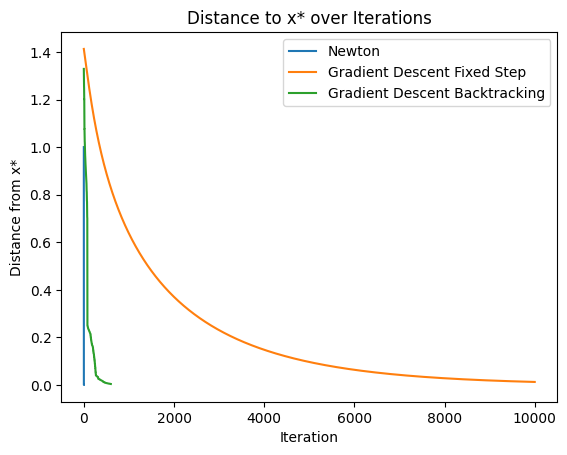

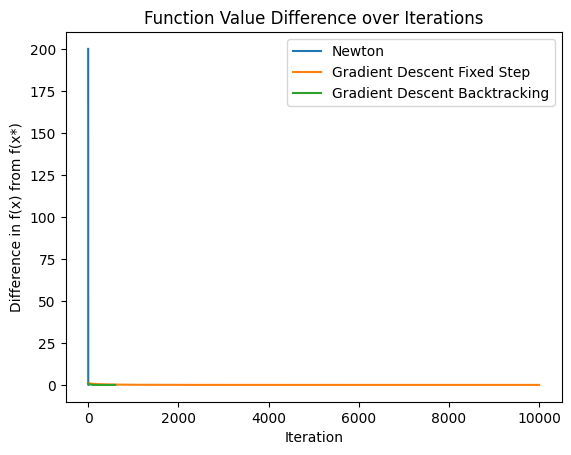

In [32]:
import matplotlib.pyplot as plt

# Run each algorithm
x0 = np.array([0, 0])
_, newton_dists, newton_f_diffs = newtons_method(x0)
_, gd_fixed_dists, gd_fixed_f_diffs = gradient_descent_2b(x0)
_, gd_backtrack_dists, gd_backtrack_f_diffs = gradient_descent_2c(x0)

# Plotting distances
plt.figure()
plt.plot(newton_dists, label='Newton')
plt.plot(gd_fixed_dists, label='Gradient Descent Fixed Step')
plt.plot(gd_backtrack_dists, label='Gradient Descent Backtracking')
plt.xlabel('Iteration')
plt.ylabel('Distance from x*')
plt.title('Distance to x* over Iterations')
plt.legend()
plt.show()

# Plotting function differences
plt.figure()
plt.plot(newton_f_diffs, label='Newton')
plt.plot(gd_fixed_f_diffs, label='Gradient Descent Fixed Step')
plt.plot(gd_backtrack_f_diffs, label='Gradient Descent Backtracking')
plt.xlabel('Iteration')
plt.ylabel('Difference in f(x) from f(x*)')
plt.title('Function Value Difference over Iterations')
plt.legend()
plt.show()


# Comment on Performance

Newton's method is obviously the fastest for this function, with backtracking line search coming close, and normal GD flattening out after around 8000 iterations. Newton's Method was expected to show rapid convergence due to it being a quadratic. GD with backtracking line search has shown much better performance than normal GD but it still is not as good as Newton's Method for this function.